<a href="https://colab.research.google.com/github/TomPianet/ecolab-13-14/blob/main/Session_13_14_Economic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Sigmoid Function Graph")

# Place a marker on x=0
marker_x = 0
marker_y = 1 / (1 + np.exp(-marker_x))
plt.scatter(marker_x, marker_y, color='red', marker='o', label="x=0")

# Add a legend to the plot
plt.legend()

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Generating synthetic data
# np.random.seed(0)
x1 = np.random.normal(50, 10, 100)  # Exam 1 scores
x2 = np.random.normal(50, 10, 100)  # Exam 2 scores
X = np.vstack((x1, x2)).T

# Admission decisions (randomized for illustration)
y = (x1 + x2 > 100).astype(int)  # Admitted if the sum of scores is more than 100

# Scatter plot of the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(x1[y == 1], x2[y == 1], color='b', label='Admitted')
plt.scatter(x1[y == 0], x2[y == 0], color='r', label='Not Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()
plt.show()


In [ ]:
# Creating and training a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Display the model coefficients
beta_0 = model.intercept_[0]
beta_1, beta_2 = model.coef_.T
print(f'Intercept (beta_0): {beta_0}, beta_1: {beta_1}, beta_2: {beta_2}')

# Now predic probabilities for some specific scores (test the result)
case1 = [[100, 100]]
p1 = model.predict_proba(case1)
print(f"for {case1} the odss of getting accepted are {p1[0][1]*100}%")

case2 = [[10, 10]]
p2 = model.predict_proba(case2)
print(f"for {case2} the odss of getting accepted are {p2[0][1]*100:.2f}%")

case3 = [[50, 50]]
p3 = model.predict_proba(case3)
print(f"for {case3} the odss of getting accepted are {p3[0][1]*100:.2f}%")

case4 = [[45, 45]]
p4 = model.predict_proba(case4)
print(f"for {case4} the odss of getting accepted are {p4[0][1]*100:.20f}%")


# verify using the actual calculation
z = beta_0 + 50 * beta_1 + 50 * beta_2
p = 1 / (1 + np.exp(-z))
print(f"{p[0]*100:.2f}")


NameError: name 'LogisticRegression' is not defined

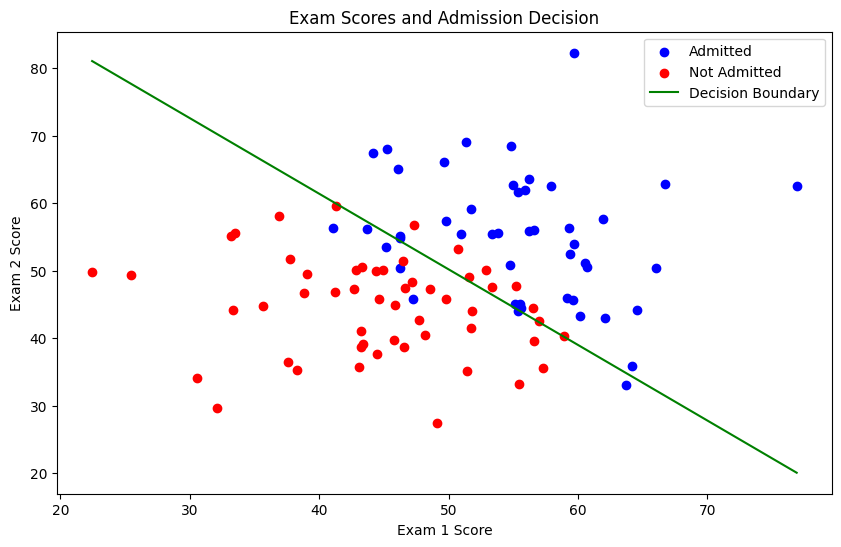

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Generating synthetic data
# np.random.seed(0)
x1 = np.random.normal(50, 10, 100)  # Exam 1 scores
x2 = np.random.normal(50, 10, 100)  # Exam 2 scores
X = np.vstack((x1, x2)).T

# Admission decisions (randomized for illustration)
noise = np.random.normal(0, 5, 100)
y = (x1 + x2 + noise > 100).astype(int)
# y = (x1 + x2 + np.random.randint(-10, 10) > 100).astype(int)  # Admitted if the sum of scores is more than 100

# Creating and training a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Decision boundary calculation
x_values = np.array([np.min(x1), np.max(x1)])
y_values = -(model.intercept_ + np.dot(model.coef_[0][0], x_values)) / model.coef_[0][1]

# Scatter plot of the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(x1[y == 1], x2[y == 1], color='b', label='Admitted')
plt.scatter(x1[y == 0], x2[y == 0], color='r', label='Not Admitted')

# Adding the decision boundary to the plot
plt.plot(x_values, y_values, label='Decision Boundary', color='green')

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Exam Scores and Admission Decision')
plt.legend()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
titanic_data = pd.read_csv('sample_data/titanic.csv')

# Preprocessing
# Fill missing values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
# print(titanic_data)

# Encode categorical variables
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)
# print(titanic_data)

# Drop unnecessary columns
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Feature scaling
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

print(titanic_data)

# Separate features (X) and target variable (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = log_reg.predict(X_test)
print(y_pred)

# Evaluate the model performance
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
titanic_data = pd.read_csv('sample_data/titanic.csv')
titanic_data.info()

# Preprocessing
# Fill missing values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop unnecessary columns
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Feature scaling
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Separate features (X) and target variable (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Instantiate and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)



